In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

address.csv
all_data.csv
blocksize.csv
etherprice.csv
ethersupplygrowth.csv
hashrate.csv
marketcap.csv
tx.csv



In [2]:
color = sns.color_palette()
%matplotlib inline

In [3]:
# Let's load the data 
data = pd.read_csv('../input/all_data.csv')
data.head()

,timestamp,total_addresses,blocksize,price_USD,hashrate,total_eth_growth,market-cap-value,transactions
0,1.438214e+09,9205.0,644.0,0.0,23.7569,7.204931e+07,7.204931e+07,8893.0
1,1.438301e+09,9361.0,582.0,0.0,48.1584,7.208550e+07,7.208550e+07,0.0
2,1.438387e+09,9476.0,575.0,0.0,55.2709,7.211320e+07,7.211320e+07,0.0
3,1.438474e+09,9563.0,581.0,0.0,64.1779,7.214143e+07,7.214143e+07,0.0
4,1.438560e+09,9639.0,587.0,0.0,69.8559,7.216940e+07,7.216940e+07,0.0


In [4]:
# Let's have an overview of all the columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 8 columns):
timestamp           684 non-null float64
total_addresses     684 non-null float64
blocksize           684 non-null float64
price_USD           684 non-null float64
hashrate            684 non-null float64
total_eth_growth    684 non-null float64
market-cap-value    684 non-null float64
transactions        684 non-null float64
dtypes: float64(8)
memory usage: 42.8 KB


In [5]:
# Convert timestamp column to proper date-time format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Drop the time for now and let's stick only with date
data['timestamp'] = data['timestamp'].apply(lambda x : pd.datetime.date(x))

data.head()

,timestamp,total_addresses,blocksize,price_USD,hashrate,total_eth_growth,market-cap-value,transactions
0,1970-01-01,9205.0,644.0,0.0,23.7569,7.204931e+07,7.204931e+07,8893.0
1,1970-01-01,9361.0,582.0,0.0,48.1584,7.208550e+07,7.208550e+07,0.0
2,1970-01-01,9476.0,575.0,0.0,55.2709,7.211320e+07,7.211320e+07,0.0
3,1970-01-01,9563.0,581.0,0.0,64.1779,7.214143e+07,7.214143e+07,0.0
4,1970-01-01,9639.0,587.0,0.0,69.8559,7.216940e+07,7.216940e+07,0.0


Let's do some analysis on the dataset now

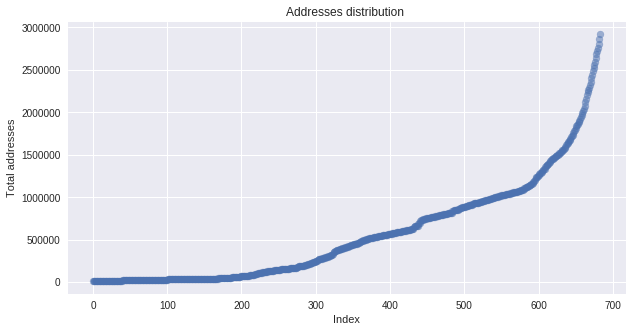

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(data)), np.sort(data.total_addresses.values),alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Total addresses')
plt.title('Addresses distribution ')
plt.show()

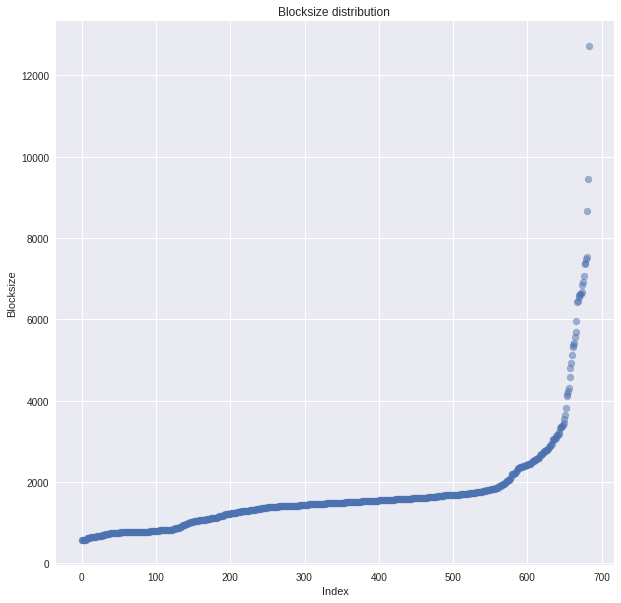

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(data)), np.sort(data.blocksize.values),alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Blocksize')
plt.title('Blocksize distribution ')
plt.show()

From the above plot, we can see that there are some outliers in our dataset, let's check them

In [8]:
blocksize_ulimit = 8000
data[data.blocksize > blocksize_ulimit]

,timestamp,total_addresses,blocksize,price_USD,hashrate,total_eth_growth,market-cap-value,transactions
438,1970-01-01,686320.0,12725.0,11.74,6191.8909,8.484240e+07,8.484240e+07,44940.0
682,1970-01-01,2859713.0,8658.0,339.68,42335.4349,9.240505e+07,9.240505e+07,240490.0
683,1970-01-01,2919025.0,9451.0,394.66,41975.3291,9.243315e+07,9.243315e+07,292941.0


Although the above three points are outliers, but there is much more important info presented here. If we see the number of transactions in the last two entries, it makes sense that number of addresses as well as blocksize should be high. 

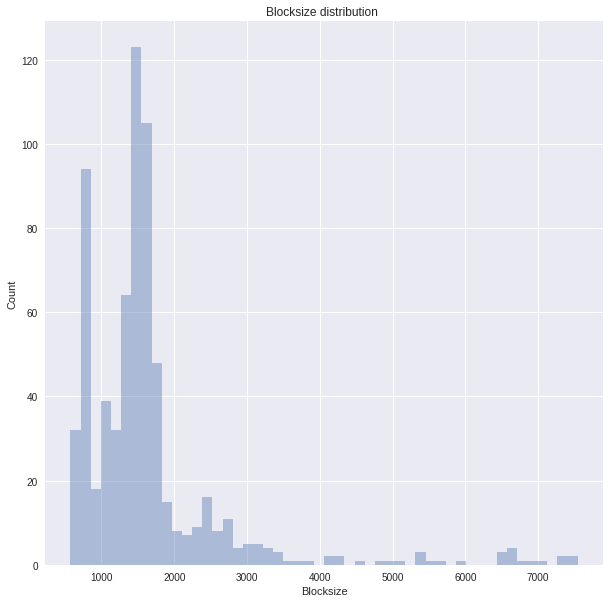

In [9]:
new_blocksize = data['blocksize'].loc[data.blocksize < blocksize_ulimit]

plt.figure(figsize=(10,10))
sns.distplot(new_blocksize.values, kde=False, bins=50)
plt.xlabel('Blocksize')
plt.ylabel('Count')
plt.title('Blocksize distribution ')
plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=719163.0, right=719163.0
  'left=%s, right=%s') % (left, right))


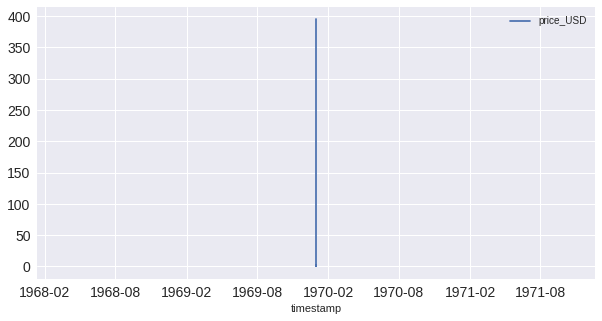

In [10]:
df = data[['timestamp','price_USD']]
df.plot(x='timestamp', y='price_USD',figsize=(10,5),fontsize=14);

**More to come. Stay tuned!!**